# Herramientas Enfocadas a la Ciencia de Datos
### Examen 27 de septiembre de 2025



### 0286155 - Manuel Alejandro Serrano Macias

#### 1. Escriba y pruebe una función que reciba un entero entre 30 y 50 y devuelva el número escrito con letra. (p.e. f(42) = 'cuarenta y dos' ).

In [1]:
def conversor_numero_letras(numero):
    unidad = {
        1: "uno",
        2: "dos",
        3: "tres",
        4: "cuatro",
        5: "cinco",
        6: "seis",
        7: "siete",
        8: "ocho",
        9: "nueve"
    }

    decena = {
        30: "treinta",
        40: "cuarenta",
        50: "cincuenta"
    }

    if numero in decena:
        return decena[numero]

    if 30 < numero < 40:
        return f"{decena[30]} y {unidad[numero - 30]}"

    if 40 < numero < 50:
        return f"{decena[40]} y {unidad[numero - 40]}"

    return "Número fuera de rango. Rango valido: 30 - 50"

print(conversor_numero_letras(8))
print(conversor_numero_letras(35))
print(conversor_numero_letras(37))
print(conversor_numero_letras(40))
print(conversor_numero_letras(42))
print(conversor_numero_letras(50))
print(conversor_numero_letras(78))

Número fuera de rango. Rango valido: 30 - 50
treinta y cinco
treinta y siete
cuarenta
cuarenta y dos
cincuenta
Número fuera de rango. Rango valido: 30 - 50


---

#### 2. Escriba y pruebe una función que reciba una lista de cadenas y devuelva tres valores: la cadena que tenga el mayor número de letras repetidas, la letra más repetida y el número de repeticiones, en ese orden.

#### Ejemplo:	
    fun(['uno','siempre','ferrocarril') 
    ('ferrocarril','r',4) # Devuelve tupla

In [2]:
def descriptor_cadenas(lista_cadenas):
    cadena_mayor = ""
    letra_frecuente = ""
    max_repeticiones = 0

    for cadena in lista_cadenas:
        frecuencia = {}
        for letra in cadena:
            frecuencia[letra] = frecuencia.get(letra, 0) + 1

        letra_max = max(frecuencia, key=frecuencia.get)
        repeticiones = frecuencia[letra_max]

        if repeticiones > max_repeticiones:
            cadena_mayor = cadena
            letra_frecuente = letra_max
            max_repeticiones = repeticiones

    return cadena_mayor, letra_frecuente, max_repeticiones

cadenas = ["uno", "siempre","ferrocarril"]
print(descriptor_cadenas(cadenas))

('ferrocarril', 'r', 4)


---

#### 3. Escriba y pruebe una función que reciba una cadena de enteros separados por comas y devuelva una tupla con los mismos enteros, multiplicados por dos.

#### Ejemplo:
    fun('12, 5, 9') devuelve (24, 10, 18)

In [3]:
def fun(cadena_enteros):
    lista_numeros = cadena_enteros.split(",")
    resultado = []
    for numero in lista_numeros:
        resultado.append(int(numero.strip()) * 2)
    return tuple(resultado)

print(fun('12, 5, 9'))

(24, 10, 18)


---

#### <strong>4.</strong> Escriba y pruebe una función que realice las siguientes tareas:
<ol><li type="a">Crear un arreglo de tamaño n x m con enteros aleatorios entre lmin y lmax, ambos inclusive.
 		<li type="a">Contar cuántas veces aparece cada número en el arreglo.</li>
		<li type="a">Imprimir otro arreglo cuya primera línea contenga los números que contiene el arreglo original y la segunda el número de veces que aparecen.</li>
        </ol>

#### Ejemplo:
<samp>
	def funcion(lmin,lmax,n,m):<br>
	...<br><br>
	
	funcion(5,21,2,3)
	
	[ [14 17  8]
	  [12 14 21] ] 

	[ [ 8 12 14 17 21]
	  [ 1  1  2  1  1] ]

</samp>

In [4]:
import numpy as np

def funcion(lmin, lmax, n, m):
    arreglo = np.random.randint(lmin, lmax+1, size=(n,m))
    print(f"{arreglo}\n")

    valores, conteo = np.unique(arreglo, return_counts=True)
    resultado = np.vstack((valores, conteo))

    print(f"{resultado}")

funcion(5,21,2,3)

[[18  8 10]
 [10 17  5]]

[[ 5  8 10 17 18]
 [ 1  1  2  1  1]]


---

#### <strong>5. </strong> Guarde en un DataFrame la tabla "wine-reviews.csv" y realice con ella las siguientes operaciones.	

a.  Remueva las columnas number, description, region_1 y region_2.

In [5]:
import pandas as pd

df_original = pd.read_csv("wine-reviews.csv")
df_copia = df_original.copy()
df_copia = df_copia.drop(columns=['number','description','region_1','region_2'])
df_copia

,country,designation,points,price,province,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...
496,US,Thompson Vineyard,89,39.0,California,Syrah,Rideau
497,Italy,Daniello,89,30.0,Tuscany,Red Blend,Tenuta di Trecciano
498,Italy,Il Tarabuso,89,45.0,Tuscany,Cabernet Sauvignon,Terre del Marchesato
499,Spain,NaN,89,23.0,Catalonia,Red Blend,Vega Escal


b. Imprima cuántos renglones tienen al menos un valor nulo.

In [6]:
print(df_copia.isnull().any(axis=1).sum())

138


c. Remueva todos los renglones que tengan valores nulos.

In [7]:
df_limpio = df_copia.dropna()
df_limpio

,country,designation,points,price,province,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...
494,US,Fourplay,89,43.0,California,Red Blend,Carhartt Vineyard
496,US,Thompson Vineyard,89,39.0,California,Syrah,Rideau
497,Italy,Daniello,89,30.0,Tuscany,Red Blend,Tenuta di Trecciano
498,Italy,Il Tarabuso,89,45.0,Tuscany,Cabernet Sauvignon,Terre del Marchesato


d. Imprima el promedio de calificación ('points') por país, de mayor a menor.

In [8]:
promedio_pais = df_limpio.groupby('country')['points'].mean()
promedio_pais_sorted = promedio_pais.sort_values(ascending=False)
promedio_pais_sorted

country
New Zealand     94.000000
Morocco         93.000000
Israel          91.000000
France          90.959184
US              90.457627
Germany         90.166667
Spain           90.147059
Italy           90.132075
Hungary         90.000000
Bulgaria        90.000000
Moldova         90.000000
Canada          90.000000
Greece          89.000000
Chile           89.000000
Portugal        89.000000
Argentina       88.555556
Romania         88.000000
South Africa    86.000000
Name: points, dtype: float64

e. Muestre los 5 paises con mayor porcentaje de entradas (renglones) del total, ordenados de mayor a menor.

In [9]:
renglones_por_pais = df_limpio['country'].value_counts()
porcentaje = (renglones_por_pais / len(df_limpio)) * 100
porcentaje.head(5)

country
US          48.760331
Italy       14.600551
France      13.498623
Spain        9.366391
Portugal     5.234160
Name: count, dtype: float64

f. Imprima las 5 marcas de vino ('designation') más caras.

In [10]:
top_5 = df_limpio.sort_values('price', ascending=False)['designation']
top_5.head(5)

16       Rainin Vineyard
18         Le Pigeonnier
0      Martha's Vineyard
22            Termanthia
231     Red Rock Terrace
Name: designation, dtype: object

g. ¿Cuál es el productor ('winery') con mayor cantidad de vinos registrados?

In [11]:
conteo_winery = df_limpio['winery'].value_counts()
print(conteo_winery.head(1))

winery
Bergström    4
Name: count, dtype: int64


h. ¿Cuáles son las tres variedades de uva con mayor calificación promedio?

In [12]:
promedio_variedades = df_limpio.groupby('variety')['points'].mean()
top_3 = promedio_variedades.sort_values(ascending=False).head(3)
print(top_3)

variety
Friulano              95.000000
Tannat                95.000000
Provence red blend    94.333333
Name: points, dtype: float64


i. Grafique el precio promedio por país en un diagrama de barras.

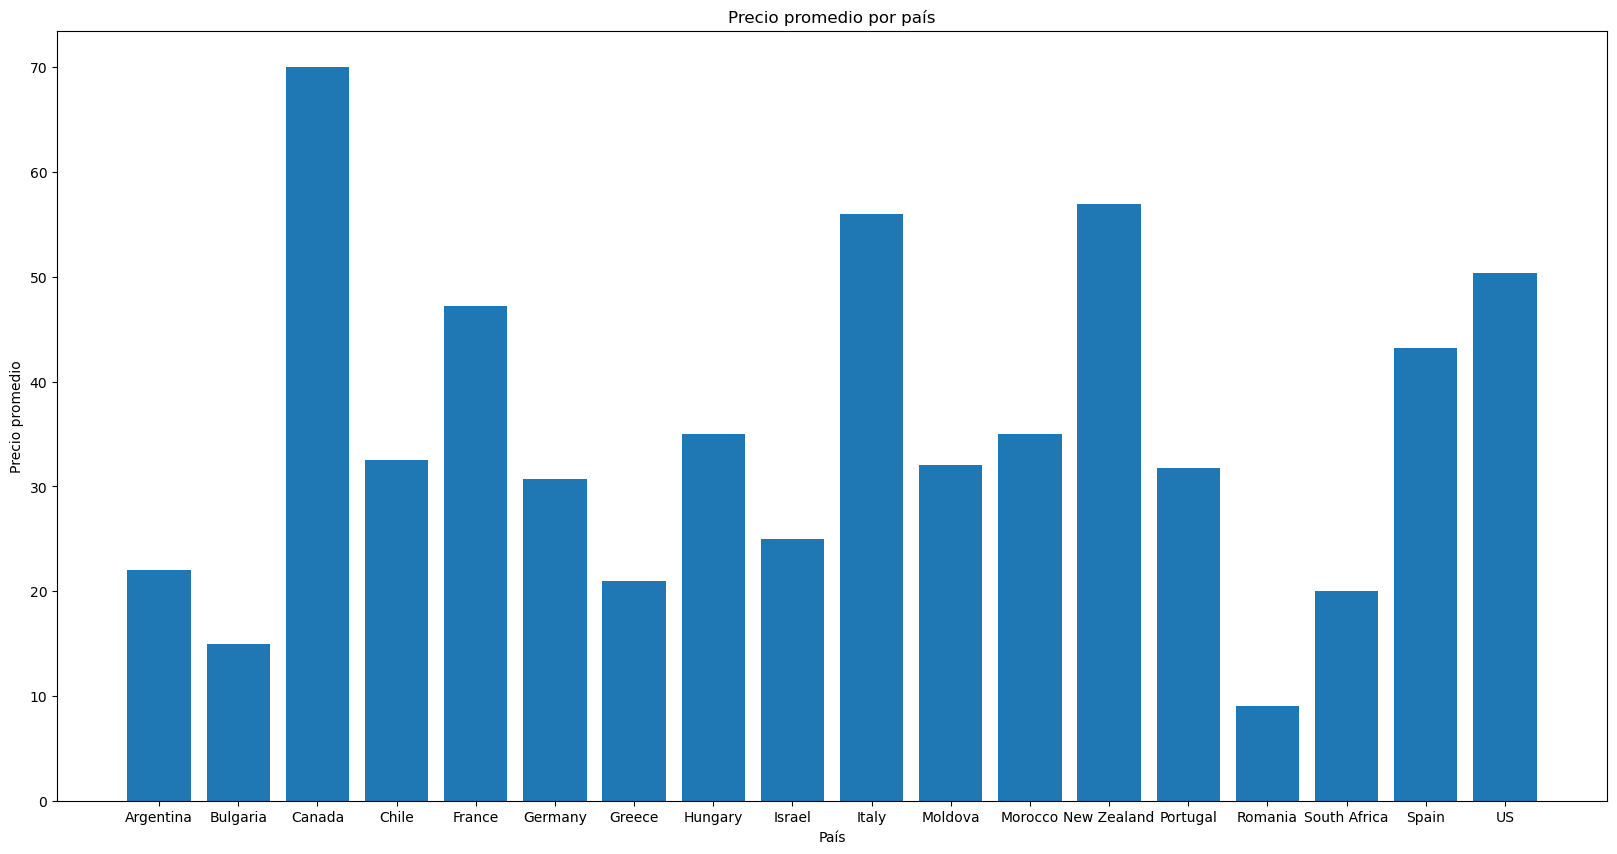

In [13]:
import matplotlib.pyplot as plt

precio_promedio = df_limpio.groupby('country')['price'].mean()
plt.figure(figsize=(20,10))
plt.bar(precio_promedio.index, precio_promedio.values)
plt.xlabel('País')
plt.ylabel('Precio promedio')
plt.title('Precio promedio por país')
plt.show()

j. Muestre un diagrama de dispersión (scatter plot) que grafique la puntuación de cada vino (ordenadas de menor a mayor) contra su precio.

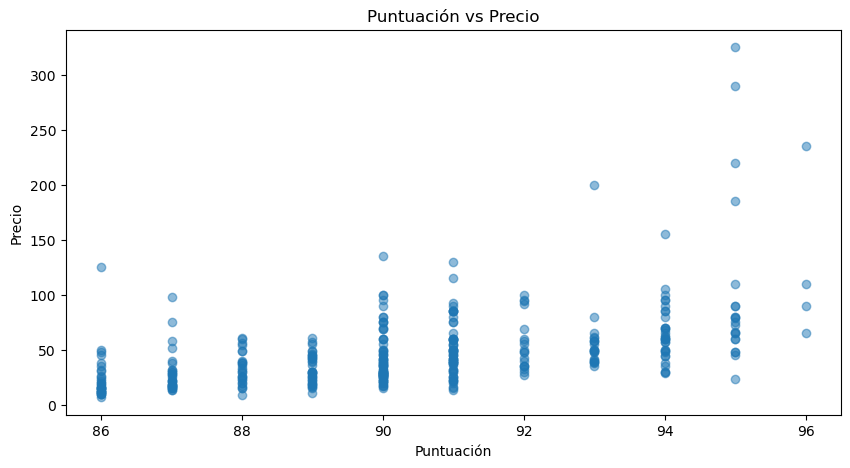

In [14]:
df_ordenado = df_limpio.sort_values('points')
plt.figure(figsize=(10,5))
plt.scatter(df_ordenado['points'], df_ordenado['price'], alpha=0.5)
plt.xlabel('Puntuación')
plt.ylabel('Precio')
plt.title('Puntuación vs Precio')
plt.show()

k. Utilice la librería ***scikit-learn*** para hacer una regresión lineal a partir de los datos del ejercicio anterior. Imprima la pendiente y la ordenada al origen de la recta.

In [15]:
from sklearn.linear_model import LinearRegression

X = df_ordenado['points'].values.reshape(-1, 1)
y = df_ordenado['price'].values

modelo_regresion = LinearRegression()
modelo_regresion.fit(X, y)

print(f"Pendiente: {modelo_regresion.coef_[0]}")
print(f"Ordenada al origen: {modelo_regresion.intercept_}")

Pendiente: 7.117818134815484
Ordenada al origen: -595.4213791766301


l. Grafique de nuevo los datos, pero esta vez incluya la línea que representa el modelo predictivo.

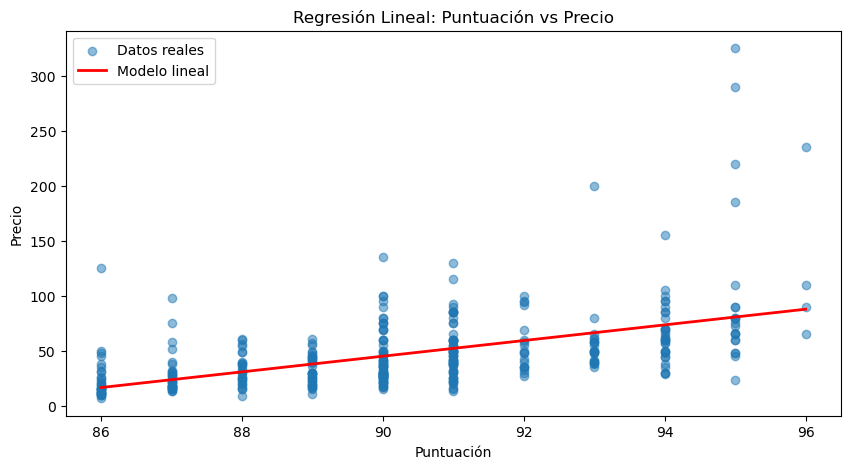

In [16]:
y_prediccion = modelo_regresion.predict(X)
plt.figure(figsize=(10,5))
plt.scatter(X, y, alpha=0.5, label='Datos reales')
plt.plot(X, y_prediccion, color='red', linewidth=2, label='Modelo lineal')

plt.xlabel('Puntuación')
plt.ylabel('Precio')
plt.title('Regresión Lineal: Puntuación vs Precio')
plt.legend()
plt.show()

m. De acuerdo con su  modelo de predicción, ¿qué costo debería tener un vino con puntuación de 98?

In [17]:
puntuacion = 98
precio_pred = modelo_regresion.predict([[puntuacion]])
print(f"Costo estimado para vino con puntuación {puntuacion}: ${precio_pred[0]:.2f}")

Costo estimado para vino con puntuación 98: $102.12


***

#### <strong>6.</strong> Guarde en un DataFrame la tabla "AI_Platforms.csv" y realice con ella las siguientes operaciones.

a. ¿Qué modalidad tiene la mayor cantidad de herramientas disponibles?

In [18]:
df = pd.read_csv("AI_Platforms.csv")
df['release_year'] = df['release_year'].astype(int)
df['open_source'] = df['open_source'].astype(int)
conteo_modalidad = df['modality'].value_counts()
modalidad_mayor = conteo_modalidad.idxmax()
print(modalidad_mayor)

multimodal


b. ¿Cuáles son las 3 compañías con mayor número de herramientas de código abierto?

In [19]:
open_source = df[df['open_source'] == 1]
conteo_companias = open_source['company'].value_counts()
top_3 = conteo_companias.head(3)
print(top_3)

company
Meta            5
Mistral AI      4
Hugging Face    4
Name: count, dtype: int64


c. Grafique el número de herramientas liberadas por año entre los años 2020 y 2025, inclusive.

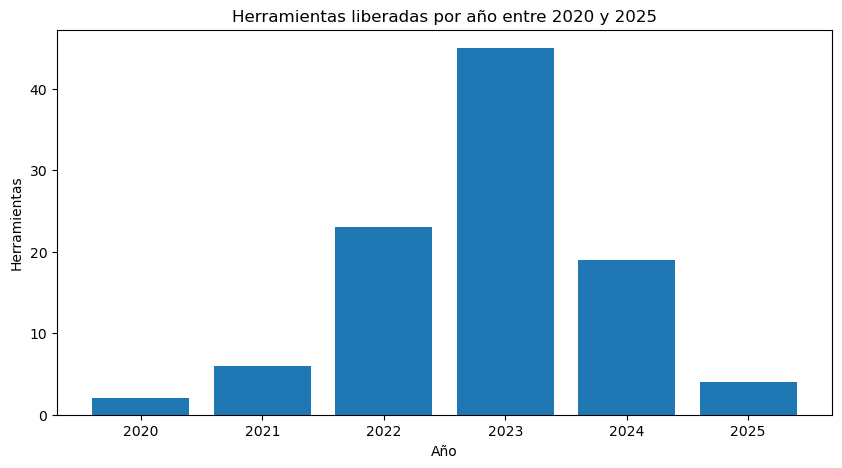

In [20]:
df_2020_2025 = df[(df['release_year'] >= 2020) & (df['release_year'] <= 2025)]
herramientas_por_anio = df_2020_2025['release_year'].value_counts().sort_index()

anios = herramientas_por_anio.index.tolist()
cantidad = herramientas_por_anio.values.tolist()

plt.figure(figsize=(10,5))
plt.bar(anios, cantidad)
plt.xlabel('Año')
plt.ylabel('Herramientas')
plt.title('Herramientas liberadas por año entre 2020 y 2025')
plt.xticks(anios)  # Asegurar que todos los años aparezcan
plt.show()

d. ¿De las liberadas antes de 2023, cuál es el total de herramientas de modalidad audio o imagen exclusivamente?

In [21]:
antes_2023 = df[df['release_year'] < 2023]
audio_o_imagen = antes_2023[antes_2023['modality'].isin(['audio', 'image'])]

total = audio_o_imagen.shape[0]
print(total)

17


e. Utilice indexado jerárquico para mostrar el número de herramientas publicadas por OpenAI, por año y por modalidad.

In [22]:
herramientas_openai = df[df['company'] == 'OpenAI']
h_openai_anio_mod = herramientas_openai.groupby(['release_year', 'modality']).size()
print(h_openai_anio_mod)

release_year  modality  
2020          code          1
2022          audio         1
              multimodal    1
2023          audio         1
              image         1
              multimodal    1
2024          video         1
2025          multimodal    2
dtype: int64


f. Imprima cuántas valores distintos existen en cada columna del conjunto de datos.

In [23]:
valores_unicos = df.nunique()
print(valores_unicos)

tool_name       113
company          83
category         13
modality         10
open_source       2
release_year     11
dtype: int64


---